In [40]:
from google.cloud import bigquery

bqclient = bigquery.Client.from_service_account_json("musa-509-75492c1cf2ae.json")

In [96]:
import pandas as pd
import geopandas as gpd
import datashader as ds
import numpy as np

import datashader.transfer_functions as tf
import matplotlib.pyplot as plt

from datashader.bundling import connect_edges, hammer_bundle
from datashader.colors import inferno, viridis
from datashader.utils import export_image
from datashader.utils import lnglat_to_meters

from colorcet import palette
from matplotlib import cm

In [97]:
query = """
    SELECT longitude, latitude
    FROM `tidal-digit-291220.safegraph.places`
    WHERE city = 'New York' AND region = 'NY'
        """

In [98]:
df = bqclient.query(query).result().to_dataframe()

<ipython-input-98-222ea4574fcc>:1: PyarrowMissingWarning: Converting to a dataframe without pyarrow installed is often slower and will become unsupported in the future. Please install the pyarrow package.
  df = bqclient.query(query).result().to_dataframe()


In [99]:
X, Y = lnglat_to_meters(df['longitude'], df['latitude'])

df['X'] = X
df['Y'] = Y

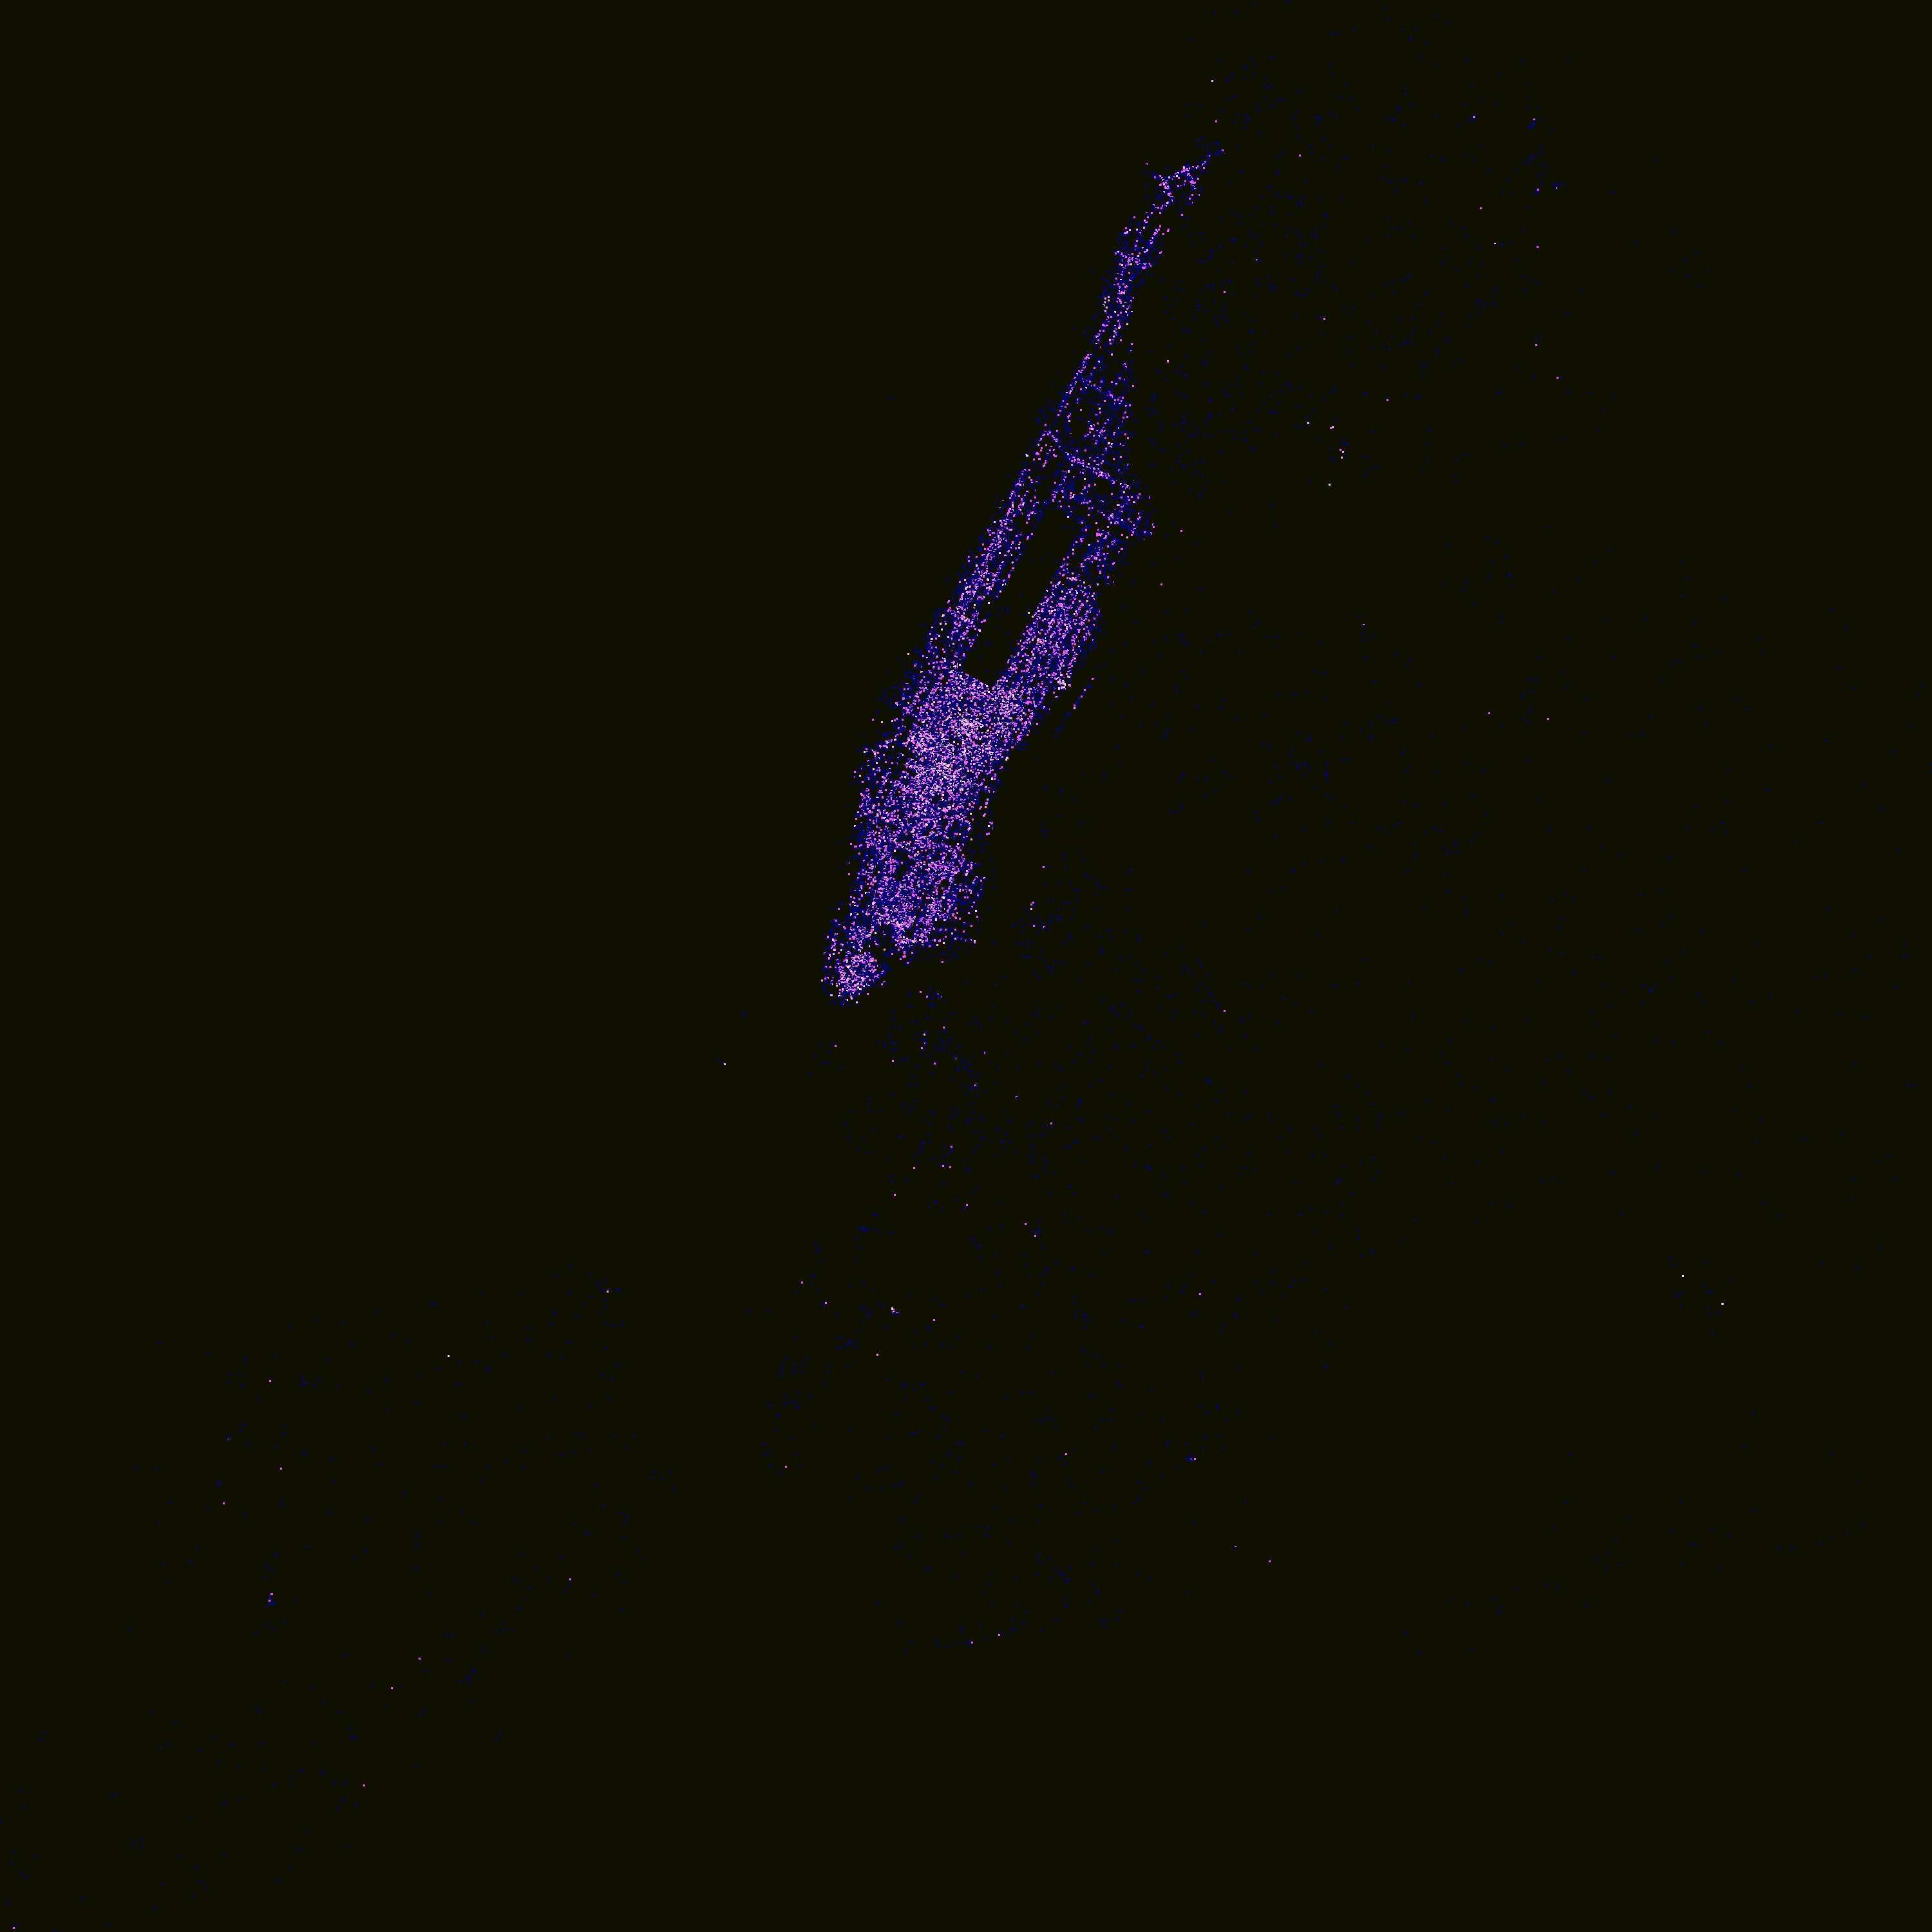

In [100]:
df['outlier_x'] = pd.qcut(df.X, 100, labels=False)
df['outlier_y'] = pd.qcut(df.Y, 100, labels=False)

for i in np.arange(1, 10):
    df = df[(df['X']!=df['X'].min()) & (df['Y']!=df['Y'].min())]
    df = df[(df['X']!=df['X'].max()) & (df['Y']!=df['Y'].max())]

range_x = (df['X'].min(), df['X'].max())
range_y = (df['Y'].min(), df['Y'].max())

wi = int(3000)
hi = int(3000)

cvs = ds.Canvas(plot_width=wi, plot_height=hi, x_range=range_x, y_range=range_y)
agg = cvs.points(df, "X", "Y", agg=ds.count())
img = tf.shade(agg, cmap=palette['CET_L7'][20:], how="eq_hist")
img = tf.spread(img, px=1, how='saturate')
img = tf.set_background(img, "#101000")

img

In [101]:
query = """
    SELECT longitude, latitude
    FROM `tidal-digit-291220.safegraph.places`
    WHERE city = 'Los Angeles' AND region = 'CA'
        """

In [102]:
df = bqclient.query(query).result().to_dataframe()

<ipython-input-102-222ea4574fcc>:1: PyarrowMissingWarning: Converting to a dataframe without pyarrow installed is often slower and will become unsupported in the future. Please install the pyarrow package.
  df = bqclient.query(query).result().to_dataframe()


In [103]:
X, Y = lnglat_to_meters(df['longitude'], df['latitude'])

df['X'] = X
df['Y'] = Y

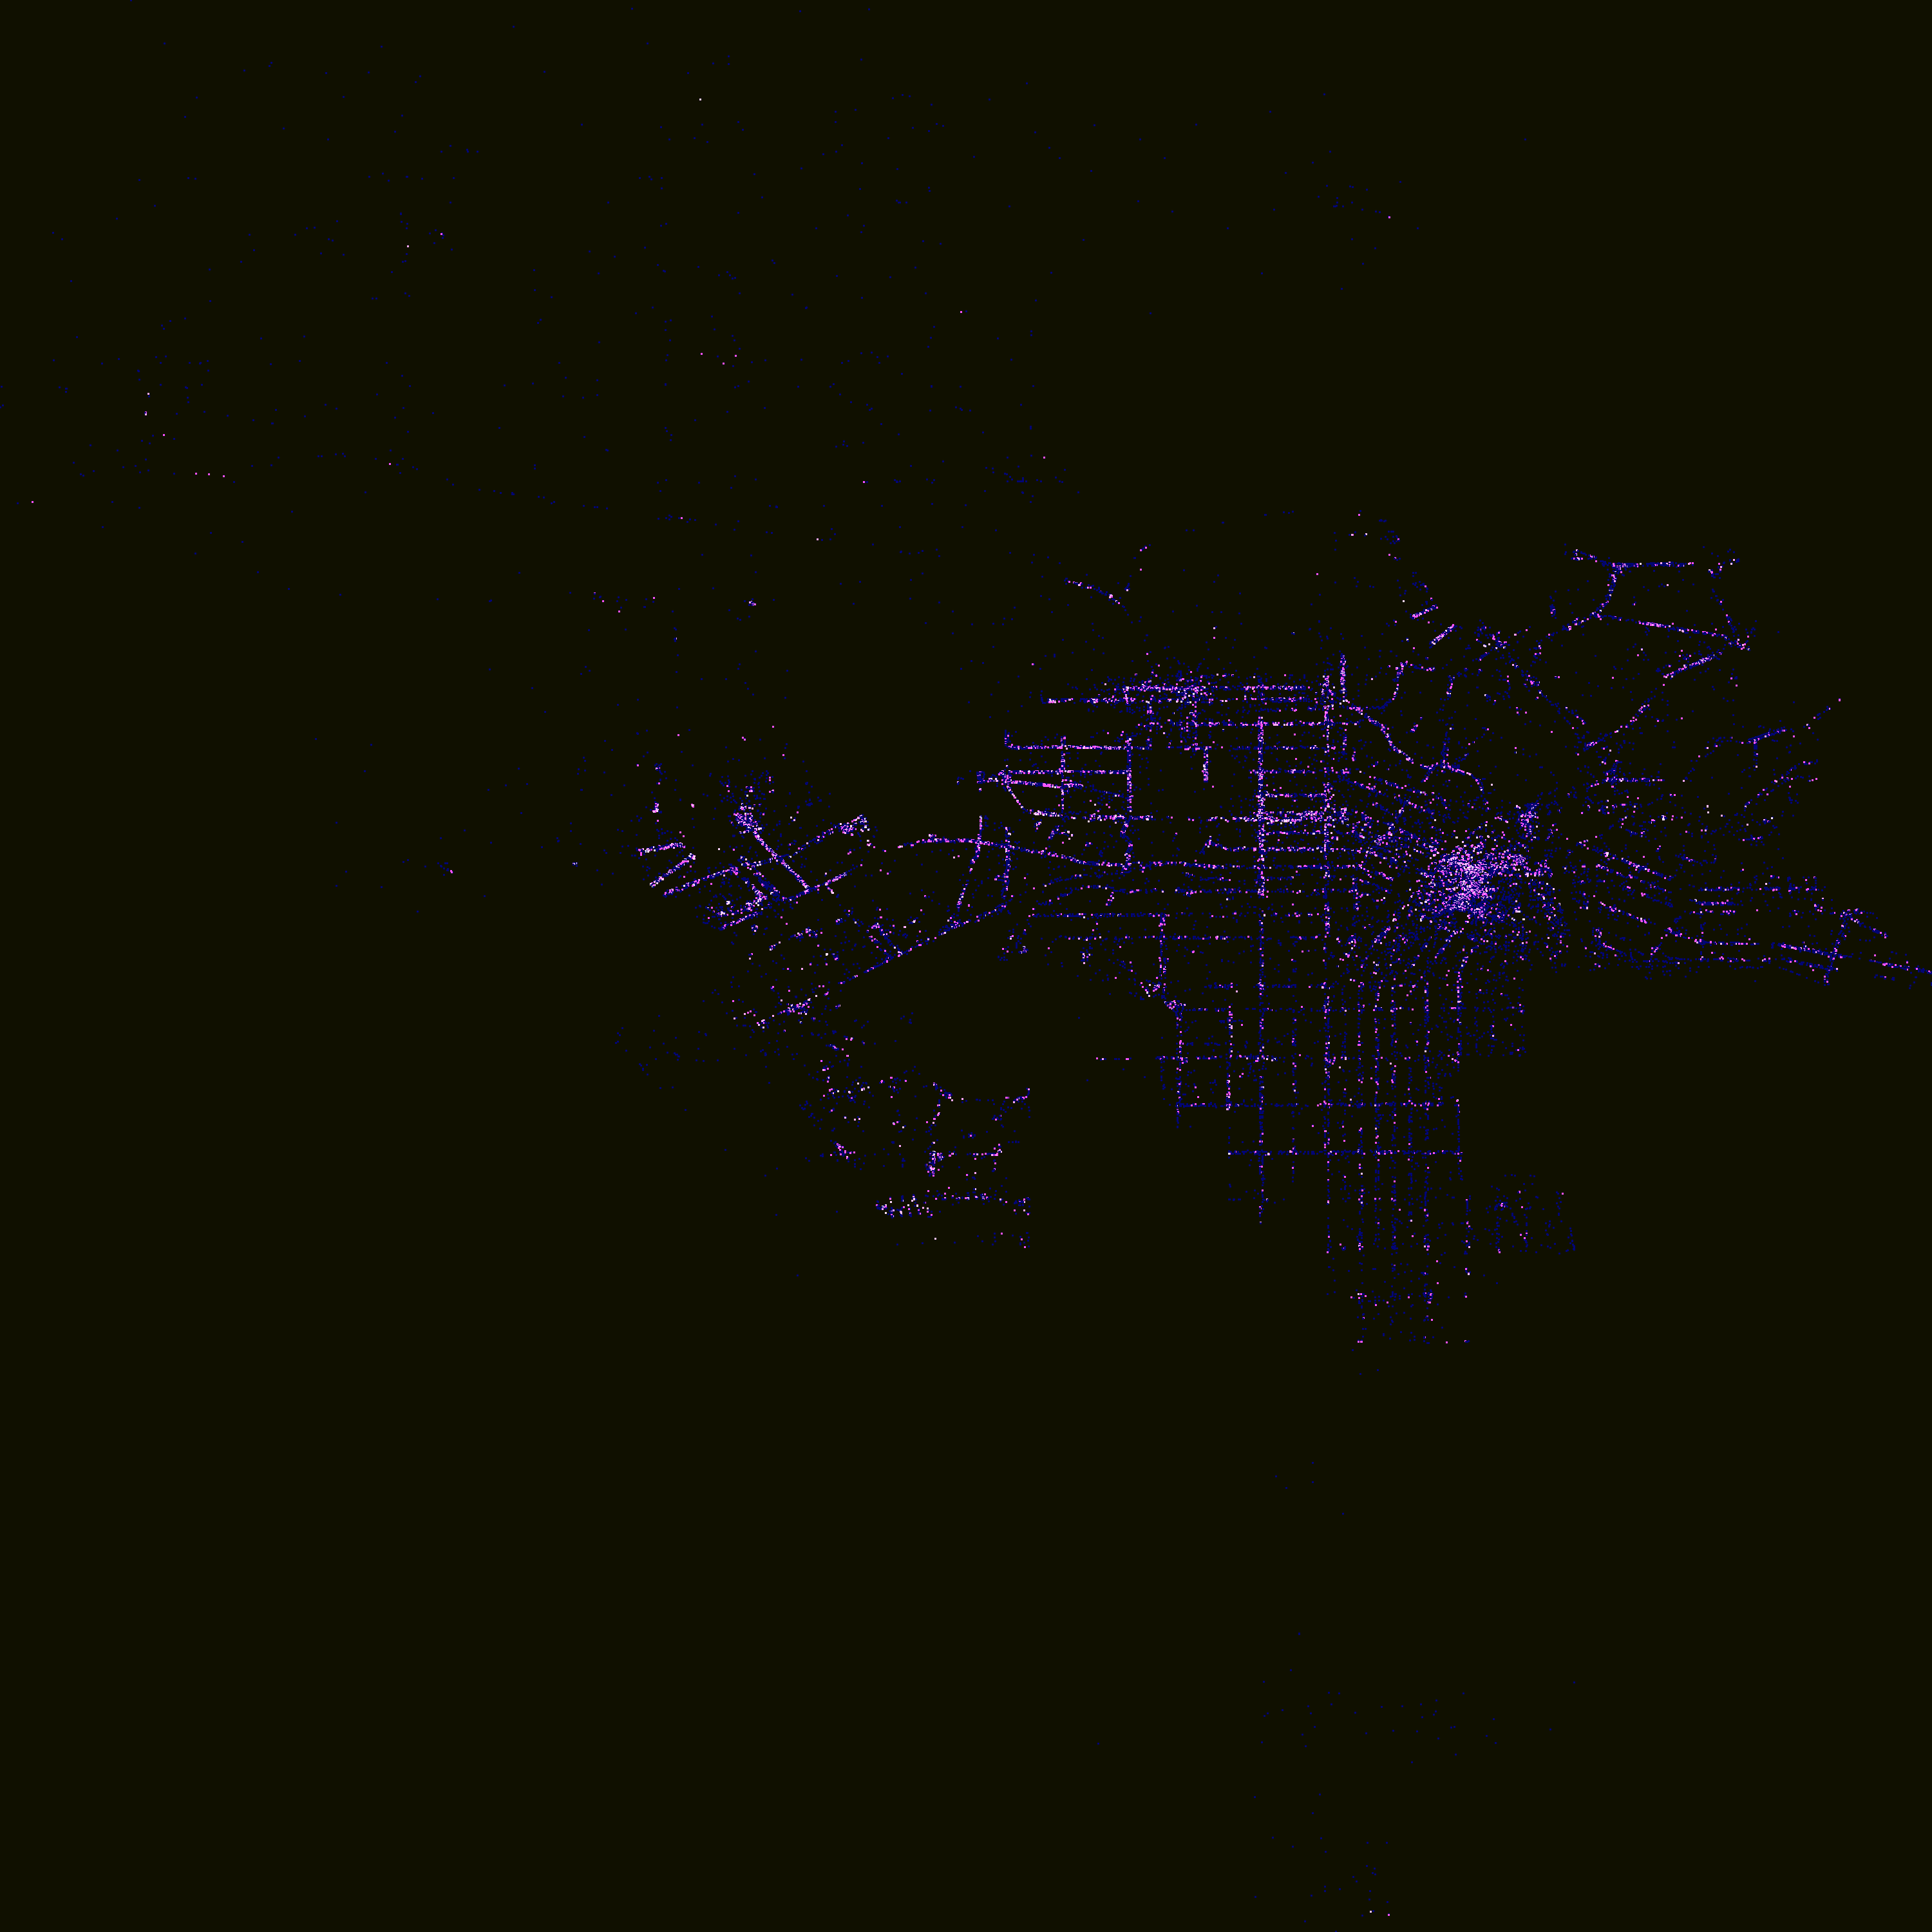

In [104]:
df['outlier_x'] = pd.qcut(df.X, 100, labels=False)
df['outlier_y'] = pd.qcut(df.Y, 100, labels=False)


for i in np.arange(1, 10):
    df = df[(df['X']!=df['X'].min()) & (df['Y']!=df['Y'].min())]
    df = df[(df['X']!=df['X'].max()) & (df['Y']!=df['Y'].max())]

range_x = (df['X'].min(), df['X'].max())
range_y = (df['Y'].min(), df['Y'].max())

wi = int(3000)
hi = int(3000)

cvs = ds.Canvas(plot_width=wi, plot_height=hi, x_range=range_x, y_range=range_y)
agg = cvs.points(df, "X", "Y", agg=ds.count())
img = tf.shade(agg, cmap=palette['CET_L7'][20:], how="eq_hist")
img = tf.spread(img, px=1, how='saturate')
img = tf.set_background(img, "#101000")

img